<center><h1>Demo usage</h1></center>

In [9]:
import torch
import pickle
import numpy as np

## Beat tracking from MIDI performance recording

In [12]:
from pm2s.features.beat import RNNJointBeatProcessor
import mir_eval
import pretty_midi as pm

# Get one MIDI recording from the A_MAPS dataset
midi_recording = 'eval/Jewel.mid'#'pm2s/data/A-MAPS_1/MAPS_MUS-alb_se2_ENSTDkCl.mid' # MAPS_MUS-bk_xmas1_ENSTDkCl.mid'

# Create a beat processor
processor = RNNJointBeatProcessor()

# Process the MIDI recording to the beat predictions
beats_pred = processor.process(midi_recording)

# Ground truth beats
midi_data = pm.PrettyMIDI(midi_recording)
beats_targ = midi_data.get_beats()

# F-measure for beat tracking
beats_pred_trimmed = mir_eval.beat.trim_beats(beats_pred)
beats_targ_trimmed = mir_eval.beat.trim_beats(beats_targ)
f1 = mir_eval.beat.f_measure(beats_targ_trimmed, beats_pred_trimmed)

print('First 10 predicted beats:')
print(beats_pred[:10])
print('First 10 target beats:')
print(beats_targ[:10])
print('F1 score for beat tracking: {}'.format(f1))

/rhome/beyer/miniconda3/envs/PM2S/lib/python3.10/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


First 10 predicted beats:
[0.         1.052632   2.105264   3.157896   4.210528   5.394739
 6.315792   7.368424   8.421056   9.53838101]
First 10 target beats:
[0.       0.526316 1.052632 1.578948 2.105264 2.63158  3.157896 3.684212
 4.210528 4.736844]
F1 score for beat tracking: 0.6443381180223285


Plot the beat prediction and piano roll for a short segment:

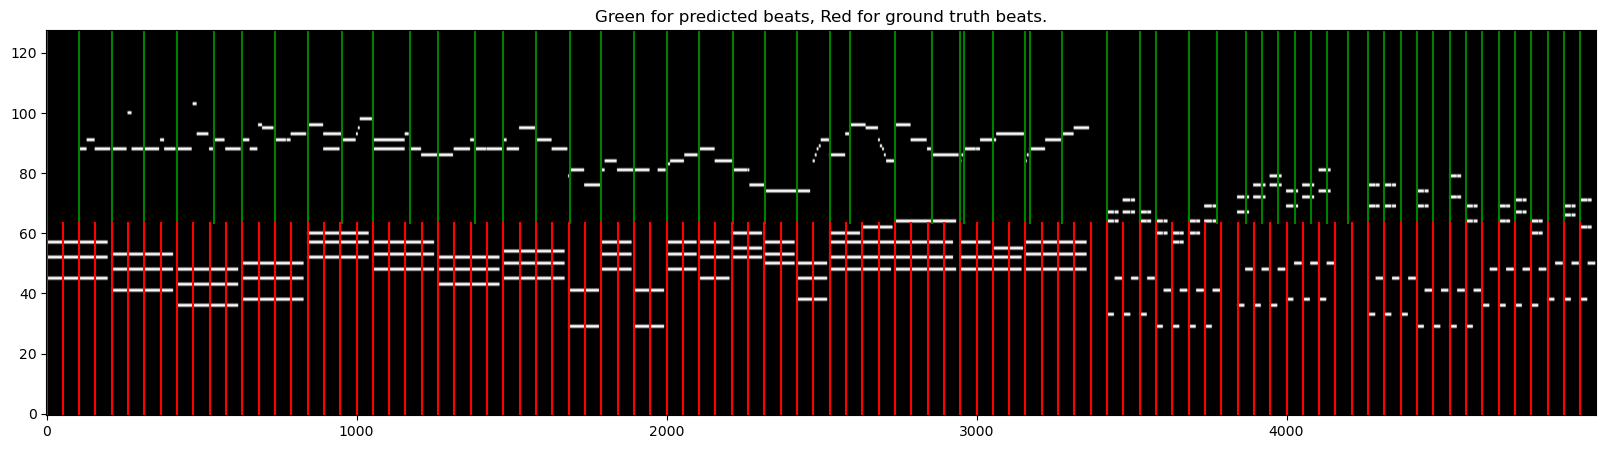

In [13]:
import numpy as np
import pretty_midi as pm
import matplotlib.pyplot as plt

def get_piano_roll(midi_file, start_time, end_time):

    pr = np.zeros((128, int((end_time - start_time) * 100)))

    for instrument in pm.PrettyMIDI(midi_file).instruments:
        for note in instrument.notes:
            if note.start >= end_time or note.end <= start_time:
                continue
            start = int((note.start - start_time) * 100)
            end = int((note.end - start_time) * 100)

            pr[note.pitch, start:end] = 1
    
    return pr

midi_data = pm.PrettyMIDI(midi_recording)
beats_targ = midi_data.get_beats()

start_time, end_time = 0, 50
beats_pred_seg = beats_pred[np.logical_and(beats_pred >= start_time, beats_pred <= end_time)]
beats_targ_seg = beats_targ[np.logical_and(beats_targ >= start_time, beats_targ <= end_time)]
pr_seg = get_piano_roll(midi_recording, start_time, end_time)

plt.figure(figsize=(20, 5))
plt.imshow(pr_seg, aspect='auto', origin='lower', cmap='gray')
for b in beats_pred_seg:
    plt.axvline(x=(b - start_time) * 100, ymin=0.5, ymax=1, color='g')
for b in beats_targ_seg:
    plt.axvline(x=(b - start_time) * 100, ymin=0, ymax=0.5, color='r')
plt.title('Green for predicted beats, Red for ground truth beats.')
plt.show()

## Quantisation from a MIDI performance

In [14]:
from pm2s.features.quantisation import RNNJointQuantisationProcessor

# Get one MIDI recording from the A_MAPS dataset
midi_recording = 'pm2s/data/A-MAPS_1/MAPS_MUS-bk_xmas1_ENSTDkCl.mid'
# Create a quantisation processor
processor = RNNJointQuantisationProcessor()

# Process the MIDI recording to the beat predictions
beats, onset_positions, note_values = processor.process(midi_recording)
print('onset positions and note values in number of beats:')
print(beats[:20])
print(onset_positions[:20])
print(note_values[:20])

onset positions and note values in number of beats:
[ 0.52443221  1.70926167  2.34013667  2.90572772  3.47131877  4.12937942
  4.71532387  5.30126833  5.9341265   6.50396     7.06531708  7.72614937
  8.3073141   8.88847883  9.50831167 10.0949     10.6679     11.27333542
 11.8572625  12.44118958]
[0.         0.         1.         1.         1.         1.5
 1.5        1.66666667 1.66666667 1.66666667 1.66666667 2.66666667
 2.         2.         2.         3.         3.08333333 3.16666667
 3.25       4.33333333]
[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.16666667
 0.16666667 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.08333333 0.66666667 0.66666667 0.66666667 0.08333333 0.08333333
 0.08333333 0.08333333]


In [33]:
print(eval.__code__.co_consts[10]())

TypeError: 'str' object is not callable

## Hand part prediction

In [6]:
from pm2s.features.hand_part import RNNHandPartProcessor

# Get one MIDI recording from the A_MAPS dataset
midi_recording = 'pm2s/data/A-MAPS_1/MAPS_MUS-bk_xmas1_ENSTDkCl.mid'
# Create a hand part prediction processor
processor = RNNHandPartProcessor()

# Predict hand part for each note in the MIDI recording
hand_parts = processor.process(midi_recording)

print(hand_parts[:20])

[0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0]


## Time, key signature prediction

In [11]:
from pm2s.features.time_signature import RNNTimeSignatureProcessor
from pm2s.features.key_signature import RNNKeySignatureProcessor

# Get one MIDI recording from the A_MAPS dataset
# midi_recording = 'pm2s/data/A-MAPS_1/MAPS_MUS-bk_xmas1_ENSTDkCl.mid'
# Create time and key processors
processor_time_sig = RNNTimeSignatureProcessor()
processor_key_sig = RNNKeySignatureProcessor()

# Prediction
time_signature_changes = processor_time_sig.process(midi_recording)
key_signature_changes = processor_key_sig.process(midi_recording)

print("Time signature changes:")
print(time_signature_changes)
print("\nKey signature changes:")
print(key_signature_changes)

Time signature changes:
[(0.5219849999999999, '4/4'), (196.13798412499986, '3/4'), (197.8063507291665, '4/4'), (223.2249837499997, '3/4'), (226.91168368749976, '4/4'), (228.90098368749977, '3/4'), (231.95998362499975, '4/4'), (240.99098362499973, '3/4'), (242.97598362499969, '4/4'), (254.06698337499967, '3/4'), (256.6189833749997, '4/4'), (277.1679810624997, '3/4'), (374.26097570833275, '4/4'), (377.2430585416661, '3/4'), (377.61369604166606, '4/4')]

Key signature changes:
[(0.5219849999999999, 'Db')]
